1. 6번 파일(8월 27일 기준 ETF의 구성 종목)에서 시가총액 상위 50위 etf 추출하기

data1 = 6번파일 / data2 = 1번파일 / data3 = 2번파일

In [2]:
import pandas as pd
data1 = pd.read_csv('data_yoonseo\\NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='cp949')
result1 = data1.groupby('etf_tck_cd')['mkt_vlu'].sum().reset_index()
시가총액_top_50 = result1.sort_values(by='mkt_vlu', ascending=False).head(50)
display(시가총액_top_50)

,etf_tck_cd,mkt_vlu
107,VTI,1632609396735
105,VOO,1168848786417
83,SPY,537149441711
40,IVV,486185746208
67,QQQ,270418248248
102,VEA,184220461283
103,VIG,93160184864
108,VWO,84908032182
94,TQQQ,71806951554
109,VYM,66157174607


2. 1번 파일(8월 27일 기준 해외종목 정보)에서 업종분류명, 섹터분류명, 산업명 열 빼와서 6번 파일(8월 27일 기준 ETF의 구성 종목)과 병합하기

In [3]:
data2 = pd.read_csv('C:\\Users\\11\\Downloads\\open\\NH_CONTEST_NW_FC_STK_IEM_IFO.csv', encoding='cp949')
data2_selected = data2[['tck_iem_cd', 'btp_cfc_nm', 'ser_cfc_nm', 'ids_nm', 'mkt_pr_tot_amt']]
merged_result = pd.merge(data1, data2_selected, on='tck_iem_cd', how='inner')
display(merged_result)

,etf_tck_cd,tck_iem_cd,mkt_vlu,fc_sec_eng_nm,fc_sec_krl_nm,stk_qty,wht_pct,sec_tp,btp_cfc_nm,ser_cfc_nm,ids_nm,mkt_pr_tot_amt
0,AAPB,AAPL,36858666,AAPL,애플,215737,66.778,ST,Phones & Smart Phones,Technology,Consumer Electronics,3454684.01
1,AAPB,USD,18337384,US Dollars,프로셰어즈 울트라 반도체,0,33.222,EF,-,-,-,0.00
2,AMDL,USD,3257693,US Dollars,프로셰어즈 울트라 반도체,0,33.282,EF,-,-,-,0.00
3,AMDL,AMD,6530355,AMD,에이엠디,36558,66.718,ST,Semiconductors (NEC),Technology,Semiconductors,242772.28
4,CLOU,TWLO,15400502,TWILIO INC - A,트윌리오,254933,4.266,ST,Software (NEC),Technology,Software - Infrastructure,9743.59
...,...,...,...,...,...,...,...,...,...,...,...,...
18511,TAN,CSIQ,18712550,Canadian Solar Inc,캐나디안 솔라,1382020,1.897,ST,Photovoltaic Solar Systems & Equipment,Technology,Solar,895.02
18512,TAN,AY,18652217,Atlantica Sustainable Infrastructure PLC,아틀란티카 일드,843610,1.891,ST,Alternative Electric Utilities,Utilities,Utilities - Renewable,2588.02
18513,TAN,RNW,7690201,ReNew Energy Global PLC,리뉴 에너지,1296830,0.780,ST,Renewable IPPs,Utilities,Utilities - Renewable,2063.37
18514,TAN,AMPS,5794798,Altus Power Inc,알터스 파워,1833797,0.587,ST,Solar Electric Ultilities,Utilities,Utilities - Renewable,487.97


아래 df = etf명, etf 구성 종목, 보유종목가치, 보유종목비중, 업종분류명, 섹터분류명, 산업명

In [4]:
df=merged_result[['etf_tck_cd','tck_iem_cd', 'mkt_vlu', 'wht_pct','btp_cfc_nm', 'ser_cfc_nm', 'ids_nm']]

VTI 종목들을 섹터분류명(ser_cfc_nm), 총 12개 섹터로 분류

In [5]:
df2=df[df['etf_tck_cd']=='VTI']
display(df2.ser_cfc_nm.nunique())
df3 = df2.groupby('ser_cfc_nm')['wht_pct'].sum().reset_index()
df3

12

,ser_cfc_nm,wht_pct
0,-,0.098
1,Basic Materials,2.153
2,Communication Services,8.578
3,Consumer Cyclical,10.047
4,Consumer Defensive,5.465
5,Energy,3.757
6,Financial Services,12.171
7,Healthcare,11.547
8,Industrials,8.379
9,Real Estate,2.571


시총 상위 50개 ETF 구성 종목 개수

In [6]:
# etf_tck_cd가 etf_codes에 있는 행 수 세기
etf_count = data1.groupby('etf_tck_cd').size().reset_index(name='행 개수')

etf_codes = ['VTI', 'VOO', 'SPY', 'IVV', 'QQQ', 'VIG', 'VYM', 'XLK', 'IWM',
             'SCHD', 'VNQ', 'SPLG', 'XLF', 'XLV', 'XLE', 'DIA', 'VT', 'QQQM',
             'JEPI', 'DGRO', 'SPYG', 'SPYV', 'MGK', 'SMH', 'VEA', 'XLP', 'XLU',
             'MOAT', 'DGRW', 'NOBL', 'JEPQ', 'SOXX', 'GDX', 'QYLD', 'TQQQ',
             'PAVE', 'XLRE', 'XBI', 'IBB', 'SOXL', 'ITA', 'NVDL', 'SPYD',
             'ARKK', 'CIBR', 'IHI', 'TMF', 'QLD', 'SPHD', 'SSO']

filtered_df = etf_count[etf_count['etf_tck_cd'].isin(etf_codes)]

# 결과 출력
display(filtered_df)

,etf_tck_cd,행 개수
8,ARKK,36
14,CIBR,31
20,DGRO,412
21,DGRW,297
22,DIA,31
29,GDX,53
35,IBB,212
38,IHI,55
39,ITA,39
40,IVV,495


3. 시가총액 상위 50위 이내 ETF들의 거래량 내림차순 정렬
2번파일의 acl_trd_qty(누적거래수량) 활용

In [7]:
data3 = pd.read_csv('data_chanwoo/NH_CONTEST_STK_DT_QUT.csv', encoding='cp949')
data3['tck_iem_cd'] = data3['tck_iem_cd'].str.strip()
filtered_data3 = data3[data3['tck_iem_cd'].isin(etf_codes)]
result2 = filtered_data3.groupby('tck_iem_cd')['acl_trd_qty'].sum().reset_index()
result2_sorted = result2.sort_values(by='acl_trd_qty', ascending=False)
result2_sorted

,tck_iem_cd,acl_trd_qty
24,SOXL,4.791392e+09
34,TQQQ,3.532010e+09
28,SPY,3.213682e+09
44,XLF,2.363635e+09
19,QQQ,2.263934e+09
10,IWM,2.033473e+09
16,NVDL,1.523673e+09
5,GDX,1.187074e+09
43,XLE,8.508890e+08
48,XLU,6.423742e+08


위에서 분석한 데이터 시각화

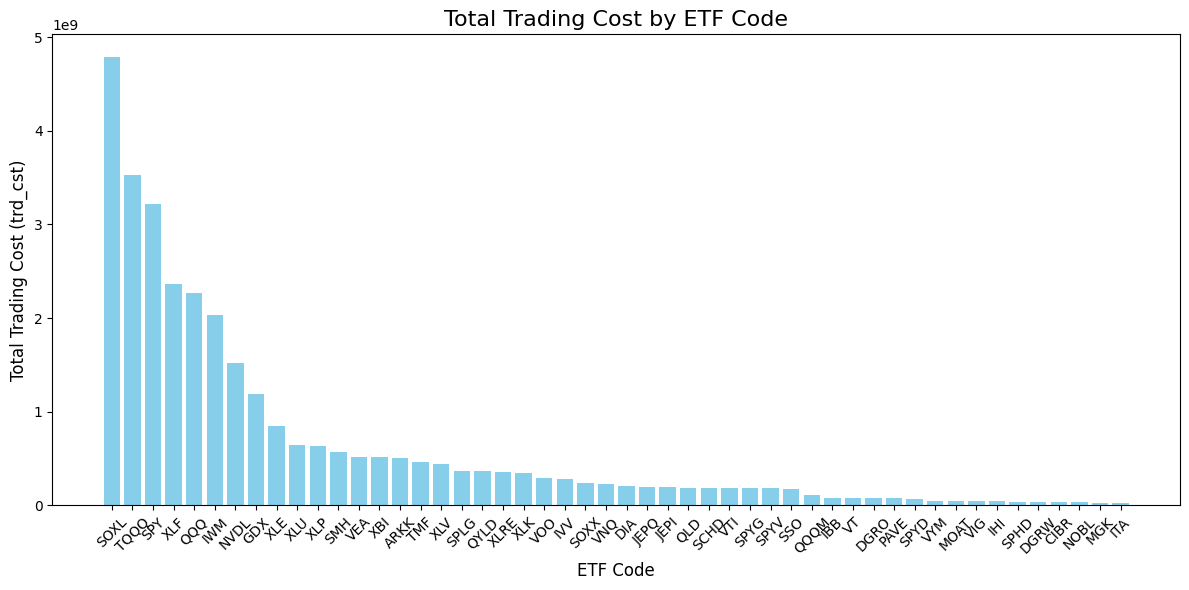

In [9]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(result2_sorted['tck_iem_cd'], result2_sorted['acl_trd_qty'], color='skyblue')

# 제목 및 라벨 설정
plt.title('Total Trading Cost by ETF Code', fontsize=16)
plt.xlabel('ETF Code', fontsize=12)
plt.ylabel('Total Trading Cost (trd_cst)', fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 회전

# 그래프 표시
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

+ 시총 상위 50위 내 ETF 거래량 말고, 그냥 거래량 상위 etf 50개 분류해본 데이터

In [17]:
etf_data = data2[data2['stk_etf_dit_cd'] == 'ETF']
tck_iem_cd_values = etf_data['tck_iem_cd'].tolist()
filtered_data4 = data3[data3['tck_iem_cd'].isin(tck_iem_cd_values)]
result3 = filtered_data4.groupby('tck_iem_cd')['acl_trd_qty'].sum().reset_index()
acl_trd_top_50 = result3.sort_values(by='acl_trd_qty', ascending=False).head(50)
acl_trd_top_50

,tck_iem_cd,acl_trd_qty
118,SOXL,4.791392e+09
137,TQQQ,3.532010e+09
124,SPY,3.213682e+09
139,TSLL,3.014736e+09
157,XLF,2.363635e+09
133,TLT,2.338694e+09
105,QQQ,2.263934e+09
93,NVD,2.221008e+09
66,IWM,2.033473e+09
45,FXI,1.967304e+09


In [ ]:
위에서 구한 두 개의 데이터셋. 1. 시총 상위 50개 etf 거래량 순위
2. 모든 etf 거래량 순위 top 50 에서 겹치는 것과 두 데이터를 병합했을 때 나오는 결과
-> 겹치는 것 : 29개 / 병합했을 때 나오는 etf 개수 : 71개

In [14]:
common_data = pd.merge(result2_sorted, acl_trd_top_50, on='tck_iem_cd')
common_data = common_data[['tck_iem_cd', 'acl_trd_qty_x']]
common_data

,tck_iem_cd,acl_trd_qty_x
0,SOXL,4.791392e+09
1,TQQQ,3.532010e+09
2,SPY,3.213682e+09
3,XLF,2.363635e+09
4,QQQ,2.263934e+09
5,IWM,2.033473e+09
6,NVDL,1.523673e+09
7,GDX,1.187074e+09
8,XLE,8.508890e+08
9,XLU,6.423742e+08


In [15]:
merged_data = pd.concat([result2_sorted, acl_trd_top_50]).drop_duplicates(subset='tck_iem_cd').reset_index(drop=True)
merged_data

,tck_iem_cd,acl_trd_qty
0,SOXL,4.791392e+09
1,TQQQ,3.532010e+09
2,SPY,3.213682e+09
3,XLF,2.363635e+09
4,QQQ,2.263934e+09
...,...,...
66,YINN,2.060095e+08
67,GLDM,2.057716e+08
68,PGX,2.009428e+08
69,CONL,1.910126e+08


4. 시가-종가 간 차이와 고가-저가 간 차이 사이의 괴리 파악 (주가 변동성 파악 목적) (시총 상위 50개 etf)

In [18]:
filtered_data3 = data3[data3['tck_iem_cd'].isin(acl_trd_top_50['tck_iem_cd'])]

import numpy as np
# gap_ong_end 열 생성 후, 시가와 종가의 차이를 열에 넣기
filtered_data3['gap_ong_end'] = np.where(
    filtered_data3['iem_ong_pr'] > filtered_data3['iem_end_pr'],
    filtered_data3['iem_ong_pr'] - filtered_data3['iem_end_pr'],
    filtered_data3['iem_end_pr'] - filtered_data3['iem_ong_pr']
)
# gap_hi_low 열 생성, 고가 - 저가를 열에 넣기
filtered_data3['gap_hi_low'] = filtered_data3['iem_hi_pr'] - filtered_data3['iem_low_pr']
filtered_data3

C:\Users\11\AppData\Local\Temp\ipykernel_4292\3836807645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['gap_ong_end'] = np.where(
C:\Users\11\AppData\Local\Temp\ipykernel_4292\3836807645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['gap_hi_low'] = filtered_data3['iem_hi_pr'] - filtered_data3['iem_low_pr']


,bse_dt,tck_iem_cd,iem_ong_pr,iem_hi_pr,iem_low_pr,iem_end_pr,bf_dd_cmp_ind_pr,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt,gap_ong_end,gap_hi_low
22541,20240612,CONL,59.502,64.8000,59.0900,60.98,4.94,8.82,3193654.0,194749021.0,1449965.0,1743689.0,1377.4,1.478,5.7100
22542,20240724,CONL,60.050,62.0000,52.5000,52.99,-5.63,-9.60,3672792.0,209735154.0,0.0,0.0,1385.1,7.060,9.5000
22543,20240610,CONL,54.880,60.4400,54.0000,58.72,2.55,4.54,1889179.0,110932591.0,876083.0,1013096.0,1366.9,3.840,6.4400
22544,20240731,CONL,47.140,47.5000,43.6400,43.78,-0.05,-0.11,2328296.0,105111002.0,0.0,0.0,1384.6,3.360,3.8600
22545,20240725,CONL,50.551,51.2870,45.0000,47.00,-5.99,-11.30,4121729.0,200016379.0,0.0,0.0,1385.1,3.551,6.2870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193818,20240812,YINN,20.690,21.1699,20.6700,20.88,0.48,2.35,1841827.0,38457347.0,3387719.0,4143068.0,1369.4,0.190,0.4999
193819,20240620,YINN,25.320,25.4300,24.7598,25.06,0.80,3.30,2953070.0,74003934.0,1330183.0,1622887.0,1380.8,0.260,0.6702
193820,20240617,YINN,23.840,24.2050,23.6101,24.11,0.86,3.70,2674080.0,64472068.0,960774.0,1713309.0,1377.7,0.270,0.5949
193821,20240724,YINN,21.650,22.0950,21.2300,21.26,-0.75,-3.41,3867080.0,82214120.0,0.0,0.0,1385.1,0.390,0.8650


In [19]:
# tck_iem_cd를 기준으로 평균 계산
result_avg = filtered_data3.groupby('tck_iem_cd').agg(
    avg_gap_ong_end=('gap_ong_end', 'mean'),
    avg_gap_hi_low=('gap_hi_low', 'mean')
    ).reset_index()
result_avg

# avg_gap_ong_end와 avg_gap_hi_low 기준으로 내림차순 정렬
sorted_result_avg = result_avg.sort_values(by=['avg_gap_ong_end', 'avg_gap_hi_low'], ascending=False).reset_index(drop=True)
sorted_result_avg

,tck_iem_cd,avg_gap_ong_end,avg_gap_hi_low
0,SMH,3.918413,7.264497
1,QQQ,3.609683,7.022252
2,SOXX,3.608587,6.677837
3,NVDL,3.079921,5.961194
4,CONL,2.874667,5.486130
5,IVV,2.740952,5.576256
6,SPY,2.718651,5.573914
7,VOO,2.491270,5.055130
8,XLK,2.221349,4.263103
9,SPXL,2.115714,4.355010


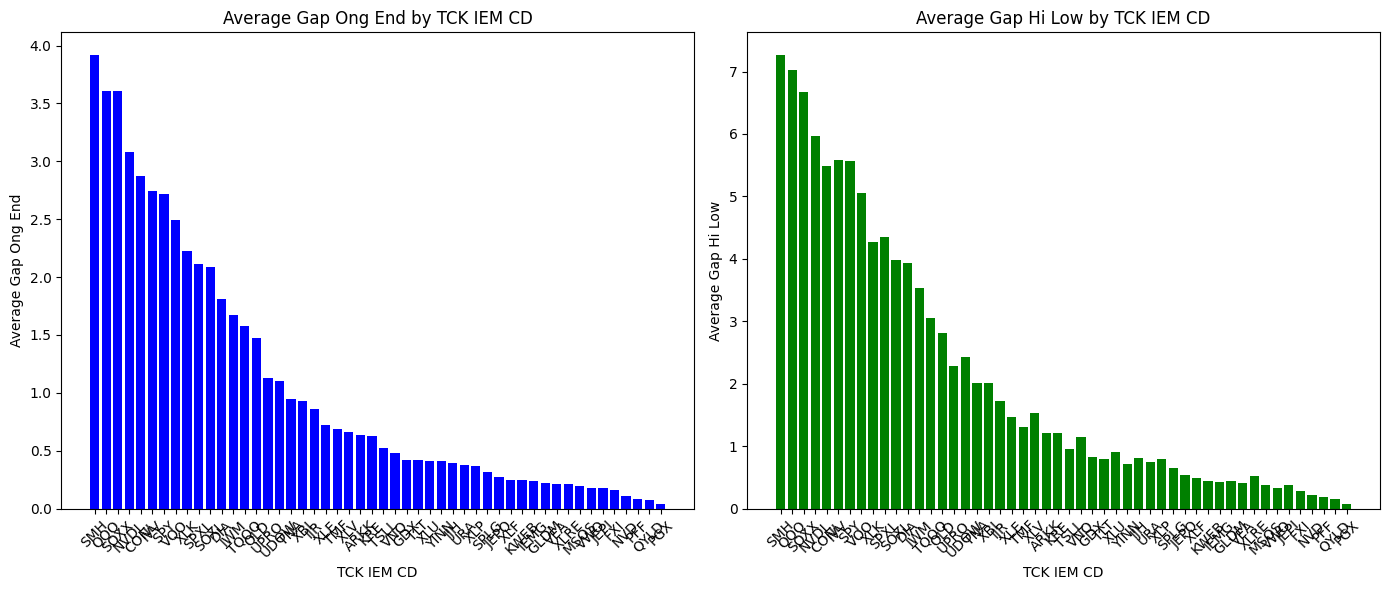

In [20]:
# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 첫 번째 그래프: avg_gap_ong_end
plt.subplot(1, 2, 1)
plt.bar(sorted_result_avg['tck_iem_cd'], sorted_result_avg['avg_gap_ong_end'], color='blue')
plt.title('Average Gap Ong End by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Average Gap Ong End')
plt.xticks(rotation=45)

# 두 번째 그래프: avg_gap_hi_low
plt.subplot(1, 2, 2)
plt.bar(sorted_result_avg['tck_iem_cd'], sorted_result_avg['avg_gap_hi_low'], color='green')
plt.title('Average Gap Hi Low by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Average Gap Hi Low')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

4.1 시가-종가 차이, 저가-고가 차이의 평균치를 합산하여 주가 변동성이 큰 순서대로 50개 나열하기

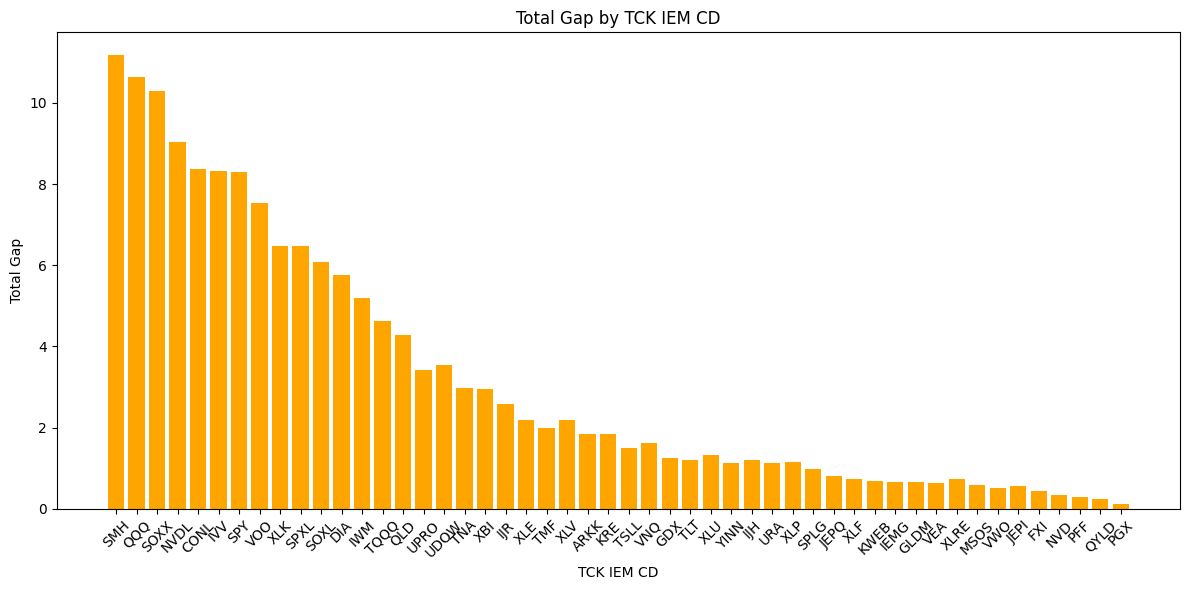

In [24]:
# avg_gap_ong_end와 avg_gap_hi_low의 합을 새로운 열로 추가
sorted_result_avg['total_gap'] = sorted_result_avg['avg_gap_ong_end'] + sorted_result_avg['avg_gap_hi_low']

# 결과를 새로운 데이터 프레임으로 생성
sum_result_avg = sorted_result_avg[['tck_iem_cd', 'total_gap']]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 바 차트 생성
plt.bar(sum_result_avg['tck_iem_cd'], sum_result_avg['total_gap'], color='orange')
plt.title('Total Gap by TCK IEM CD')
plt.xlabel('TCK IEM CD')
plt.ylabel('Total Gap')
plt.xticks(rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [28]:
# 구간 정의
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0~2', '2~4', '4~6', '6~8', '8~10', '10~']

# total_gap을 구간으로 나누기
sum_result_avg['gap_category'] = pd.cut(sum_result_avg['total_gap'], bins=bins, labels=labels, right=False)

# 결과 확인
sum_result_avg

C:\Users\11\AppData\Local\Temp\ipykernel_4292\2099080940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_result_avg['gap_category'] = pd.cut(sum_result_avg['total_gap'], bins=bins, labels=labels, right=False)


,tck_iem_cd,total_gap,gap_category
0,SMH,11.182910,10~
1,QQQ,10.631935,10~
2,SOXX,10.286424,10~
3,NVDL,9.041114,8~10
4,CONL,8.360797,8~10
5,IVV,8.317208,8~10
6,SPY,8.292565,8~10
7,VOO,7.546400,6~8
8,XLK,6.484452,6~8
9,SPXL,6.470724,6~8


위의 sum_result_avg 데이터 프레임 시각화하기 (구간 별로 나눠서)

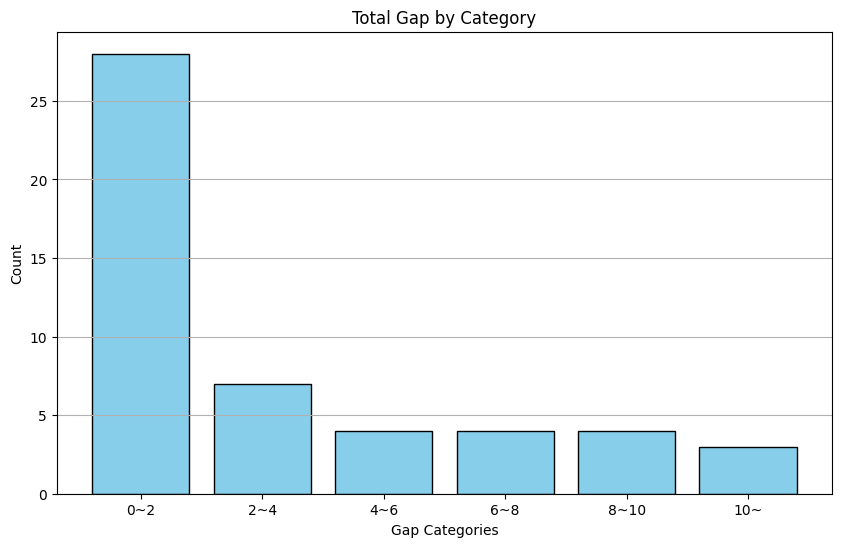

In [33]:
# 각 구간에 속하는 데이터 리스트 생성
gap_data = {label: sum_result_avg[sum_result_avg['gap_category'] == label]['tck_iem_cd'].tolist() for label in labels}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(gap_data.keys(), [len(data) for data in gap_data.values()], color='skyblue', edgecolor='black')
plt.title('Total Gap by Category')
plt.xlabel('Gap Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 그래프 표시
plt.show()

각 구간별 데이터 모음

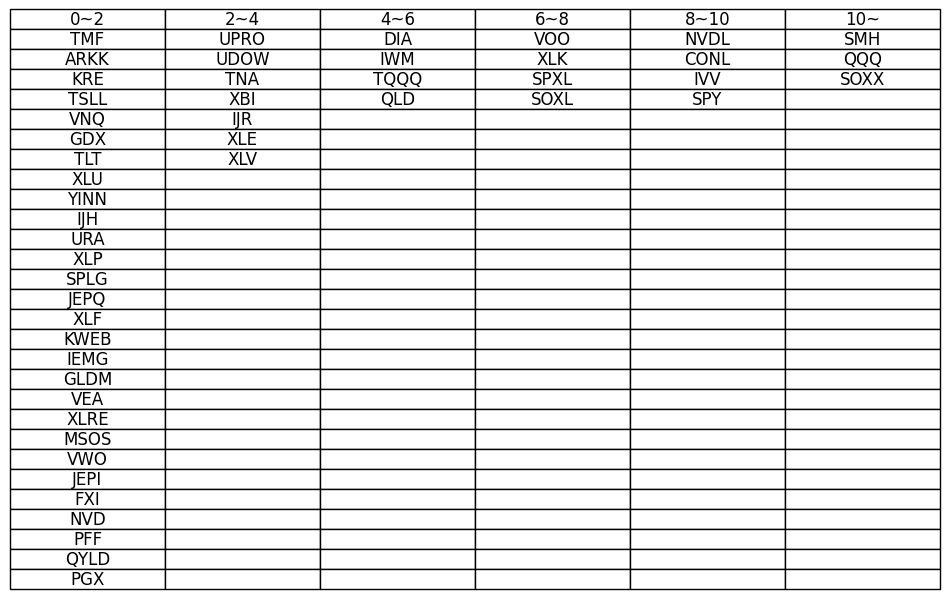

In [32]:
# DataFrame을 시각화하는 테이블 생성
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = gap_data_df.values
columns = gap_data_df.columns.tolist()

# 테이블 생성
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')

# 테이블 스타일 설정
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# 그래프 표시
plt.show()

5. 전일대비증감가격, 전일대비증감율을 활용하여 2에서 분석한 내용 재확인 -> 주가 흐름 or 2번 내용 보완 (이 부분은 앞에서 시가-종가 데이터로 보면 될 듯. 평균치까지 구해놨기 때문에 이 데이터는 사용하지 않아도 될 것 같음.)
-> 전일대비증감가격, 전일대비증감율도 일자별로 나오고, 실제 데이터로 사용하려면 어차피 평균치로 사용해야 되는데 위의 내용과 값이 거의 비슷하게 나와서 큰 쓸모 없어 보임.

6. 4) 누적거래수량 및 거래대금을 활용하여 거래량 상위 ETF 분석 (기준 범위 설정 필요) 이 부분도 위에서 다 한 내용.